In [1]:
import os

import xarray as xr
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import configparser

from modules.modules_FIG_08_10_11 import *

config = configparser.ConfigParser()
config.read("ConfigFile.ini")
pf = config['PATHS']['datasets']

ECRAD = xr.open_dataset(os.path.join(pf,"TCARS.nc"))



## Values of RMSE and MBE from CAMS RA vs AERONET comparison
# AOD,AE,SSA,G
RMSE = np.array([0.09,0.36,0.07,0.04])
MBE = np.array([-0.001,-0.12,-0.03,-0.001])

# Fig04
Fig 04 shows the relative kernels "Change of REari per 1% increase of the parameter X".

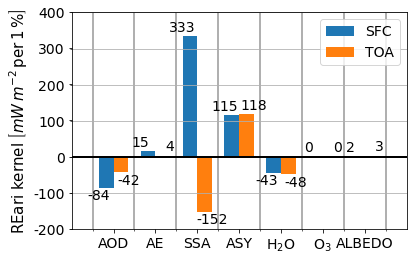

In [2]:
## FIG04
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)

perts = ['AOD','AE','SSA','ASY',r'H$_2$O',r'O$_3$','ALBEDO']
levels = ['SFC','TOA']
labels = np.array(perts)


Eyear = ECRAD.median(dim=['lat','lon'],skipna=True)
Eyear = Eyear.median(dim='day')

Ksfc = np.array([Eyear.kernel_AOD_sfc.values,
                 Eyear.kernel_AE_sfc.values,
                 Eyear.kernel_SSA_sfc.values,
                 Eyear.kernel_G_sfc.values,
                 Eyear.kernel_H2O_sfc.values,
                 Eyear.kernel_O3_sfc.values,
                 Eyear.kernel_ALBEDO_sfc.values
                ])*1000.
Ktoa = np.array([Eyear.kernel_AOD_toa.values,
                 Eyear.kernel_AE_toa.values,
                 Eyear.kernel_SSA_toa.values,
                 Eyear.kernel_G_toa.values,
                 Eyear.kernel_H2O_toa.values,
                 Eyear.kernel_O3_toa.values,
                 Eyear.kernel_ALBEDO_toa.values
                ])*1000.

for l,level in enumerate(['sfc','toa']):
    wkernel = globals()[f"K{level}"]
    width = 0.9
    width=0.35
    bar1 = ax1.bar(np.arange(len(labels))-(width/2)+l*width,
                   wkernel,
                   width=0.35,label = levels[l])
    for bar in bar1:
        height = int(bar.get_height())
        ha = 'center'
        if height >=0:
            ax1.annotate(f'{height:d}',
                         xy = (bar.get_x()+l*bar.get_width(),max(0,height-2)),#
                         xytext = (0,3),
                         textcoords="offset points",
                         ha=ha,va='bottom',
                         fontsize=14)
        else:
            ax1.annotate(f'{height:d}',
                         xy = (bar.get_x()+l*bar.get_width(),min(0,height-10)),
                         xytext = (0,3),
                         textcoords="offset points",
                         ha=ha,va='top',
                         fontsize=14)           


    
ax1.set_xlim(-1,len(labels))
ylim = ax1.get_ylim()
ax1.set_ylim([ylim[0]-20,ylim[1]+25])
ax1.set_xticks(np.arange(len(labels)))
ax1.set_xticks(np.arange(len(labels)+1)-0.5,minor=True)
ax1.set_xticklabels(labels,fontsize = 14)
ax1.set_yticks(ax1.get_yticks()+1)
ax1.set_yticklabels((ax1.get_yticks()-1).astype(int),fontsize = 14)
ax1.set_yticks(ax1.get_yticks()-1,minor=True)

ax1.tick_params('x',which='minor',grid_linewidth=2)

ax1.axhline(0,color='k',linewidth=2)
ax1.set_ylabel(r"REari kernel $\left[mW\,m^{-2}\,\mathrm{per\,1\,\%}\right] $",fontsize = 15)
ax1.legend(fontsize=14)
ax1.grid(which='minor')

plt.savefig("figures/Fig04.pdf",dpi=300,bbox_inches='tight')

# Fig05
In this Figure the relative kernels are scaled by the RMSE and MBE found in the evaluation of CAMSRA versus AERONET products. This represents the uncertainty estimate of REari on a daily basis. The REari MBE is used to correct REari in the further analysis.

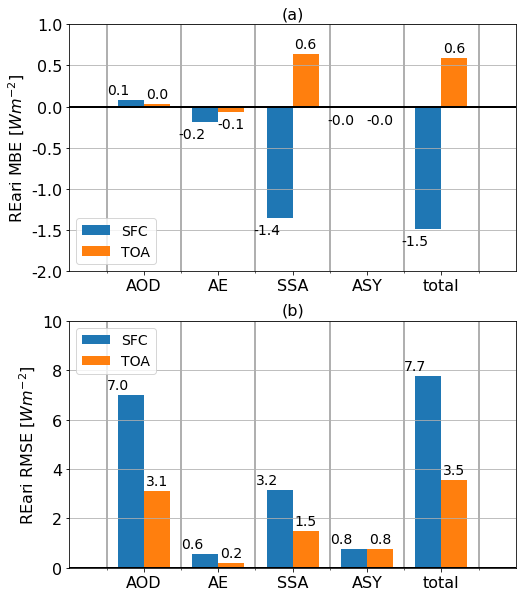

In [3]:
# median real data


levels = ['SFC','TOA']


Eyear = ECRAD.mean(dim=['day','lat','lon'],skipna=True)


pData = np.array([Eyear.AOD.values,
                   Eyear.AE.values,
                   Eyear.SSA.values,
                   Eyear.G.values])

# calcualte fraction in %
pMBE = 100.*MBE[:] / pData
pRMSE = 100.*RMSE[:] / pData



# annual mean of relative kernel
Ksfc = np.array([Eyear.kernel_AOD_sfc.values,
                  Eyear.kernel_AE_sfc.values,
                  Eyear.kernel_SSA_sfc.values,
                  Eyear.kernel_G_sfc.values])
Ktoa = np.array([Eyear.kernel_AOD_toa.values,
                  Eyear.kernel_AE_toa.values,
                  Eyear.kernel_SSA_toa.values,
                  Eyear.kernel_G_toa.values])
MBEsfc = list(Ksfc*pMBE)
MBEsfc+= [np.sum((Ksfc*pMBE))]
MBEtoa = list(Ktoa*pMBE)
MBEtoa+= [np.sum((Ktoa*pMBE))]
RMSEsfc = list(np.abs(Ksfc*pRMSE))
RMSEsfc+= [np.sqrt(np.sum((Ksfc*pRMSE)**2))]
RMSEtoa = list(np.abs(Ktoa*pRMSE))
RMSEtoa+= [np.sqrt(np.sum((Ktoa*pRMSE)**2))]



fig1 = plt.figure(figsize=(8,10))
ax1 = fig1.add_subplot(2,1,1)

ax2 = fig1.add_subplot(2,1,2)
perts = ['AOD','AE','SSA','ASY']
labels = np.array(perts+['total'])

for l,level in enumerate(['sfc','toa']):
    wkernel_mbe = np.array(globals()[f"MBE{level}"])
    wkernel_rmse = np.array(globals()[f"RMSE{level}"])
    
    width = 0.35
    bar1 = ax1.bar(np.arange(len(labels))-(width/2)+l*width,wkernel_mbe,width=0.35,label = levels[l])#,yerr=ekernels,capsize=5
    bar2 = ax2.bar(np.arange(len(labels))-(width/2)+l*width,wkernel_rmse,width=0.35,label = levels[l])
    for bar in bar1:
        height = bar.get_height()
        if height >=0:
            ax1.annotate(f'{height:.1f}',
                         xy = (bar.get_x()+l*bar.get_width()/2,max(0,height)),
                         xytext = (0,3),
                         textcoords="offset points",
                         ha='center',va='bottom',
                         fontsize=14)
        else:
            ax1.annotate(f'{height:.1f}',
                         xy = (bar.get_x()+l*bar.get_width()/2,min(0,height-0.1)),
                         xytext = (0,3),
                         textcoords="offset points",
                         ha='center',va='top',
                         fontsize=14)           
    for bar in bar2:
        height = bar.get_height()
        if height >=0:
            ax2.annotate(f'{height:.1f}',
                         xy = (bar.get_x()+l*bar.get_width()/2,max(0,height)),
                         xytext = (0,3),
                         textcoords="offset points",
                         ha='center',va='bottom',
                         fontsize=14)
        else:
            ax2.annotate(f'{height:.1f}',
                         xy = (bar.get_x()+l*bar.get_width()/2,min(0,height-0.1)),
                         xytext = (0,3),
                         textcoords="offset points",
                         ha='center',va='top',
                         fontsize=14)  

    
ax1.set_xlim(-1,len(labels))
ylim = ax1.get_ylim()
ax1.set_ylim([ylim[0]-0.2,ylim[1]+0.2])
ax1.set_xticks(np.arange(len(labels)))
ax1.set_xticks(np.arange(len(labels)+1)-0.5,minor=True)
ax1.set_xticklabels(labels,fontsize = 16)
ax1.set_yticks(ax1.get_yticks()+0.001)
ax1.set_yticklabels(np.round(ax1.get_yticks()-0.001,1),fontsize = 16)
ax1.set_yticks(ax1.get_yticks()-0.001,minor=True)

ax1.tick_params('x',which='minor',grid_linewidth=2)
ax1.axhline(0,color='k',linewidth=2)
# ax1.set_title("ARE mean bias")
ax1.set_ylabel(r"REari MBE $\left[Wm^{-2}\right]$",fontsize = 16)
ax1.legend(fontsize=14,loc=3)
ax1.grid(which='minor')
ax1.set_title('(a)',fontsize=16)


ax2.set_xlim(-1,len(labels))
ylim = ax2.get_ylim()
ax2.set_ylim([ylim[0],ylim[1]+1])
ax2.set_xticks(np.arange(len(labels)))
ax2.set_xticks(np.arange(len(labels)+1)-0.5,minor=True)
ax2.set_xticklabels(labels,fontsize = 16)
ax2.set_yticks(ax2.get_yticks()+0.001)
ax2.set_yticklabels(np.round((ax2.get_yticks()-0.001),0).astype(int),fontsize = 16)
ax2.set_yticks(ax2.get_yticks()-0.001,minor=True)

ax2.tick_params('x',which='minor',grid_linewidth=2)
ax2.axhline(0,color='k',linewidth=2)
# ax2.set_title("ARE RMSE")
ax2.set_ylabel(r"REari RMSE $\left[Wm^{-2}\right]$",fontsize = 16)
ax2.legend(loc=2,fontsize=14)
ax2.grid(which='minor')
ax2.set_title('(b)',fontsize=16)

plt.savefig("figures/Fig05.pdf",dpi=300,bbox_inches='tight')

# Fig A2
estimated RMSE of REari for instant calculation with AERONET aerosol properties. The uncertainties are estimated in the literature. ((Giles et al 2019, and Sinyuk et al 2020):
- AOD: $\pm$0.02 (Giles et al. 2019)
- SSA: $\pm$0.03 (Sinyuk et al. 2020)
- G:   $\pm$0.01 (Sinyuk et al.2020)

The AE ($\alpha$) uncertainty ($\mu$) is estimated from the AOD ($\tau$) uncertainty at different wavelengths ($\lambda$). Here the spectral independence is assumend for $\mu_\tau = \pm0.02$.

$
\begin{align}
\alpha &= - \frac{\log{\left(\frac{\tau_1}{\tau_2}\right)}}{\log{\left(\frac{\lambda_1}{\lambda_2}\right)}}\\
(\mu_\alpha)^2 &= \left(\frac{\mu_\tau}{\tau_1 \log{\left(\frac{\lambda_1}{\lambda_2}\right)}}\right)^2 + \left(\frac{\mu_\tau}{\tau_1 \log{\left(\frac{\lambda_1}{\lambda_2}\right)}}\right)^2
\end{align}
$

From this assuming $\tau_1 \simeq \tau_2$:

$
\begin{equation}
\mu_\alpha= 2\frac{\mu_\tau}{\tau},
\end{equation}
$
with a mean $\tau$ of about 0.13, the estimated uncertainty of AE is about $\pm$0.3.

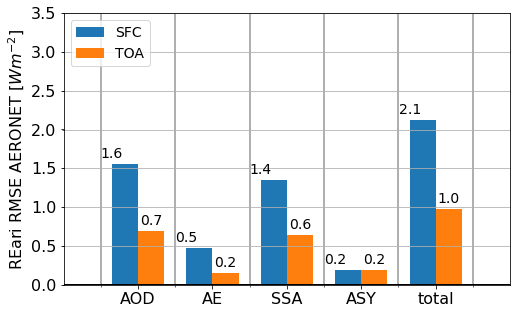

In [4]:


Eyear = ECRAD.mean(dim=['day','lat','lon'],skipna=True)


pData = np.array([Eyear.AOD.values,
                   Eyear.AE.values,
                   Eyear.SSA.values,
                   Eyear.G.values])

# random uncertainty of AERONET products according to literature
# AOD,AE,SSA,G
RMSE_aeronet = np.array([0.02,0.3,0.03, 0.01])
# calculate fraction in %
pRMSE = 100.*RMSE_aeronet[:] / pData



# annual mean of relative kernel
Ksfc = np.array([Eyear.kernel_AOD_sfc.values,
                  Eyear.kernel_AE_sfc.values,
                  Eyear.kernel_SSA_sfc.values,
                  Eyear.kernel_G_sfc.values])
Ktoa = np.array([Eyear.kernel_AOD_toa.values,
                  Eyear.kernel_AE_toa.values,
                  Eyear.kernel_SSA_toa.values,
                  Eyear.kernel_G_toa.values])

RMSEsfc = list(np.abs(Ksfc*pRMSE))
RMSEsfc+= [np.sqrt(np.sum((Ksfc*pRMSE)**2))]
RMSEtoa = list(np.abs(Ktoa*pRMSE))
RMSEtoa+= [np.sqrt(np.sum((Ktoa*pRMSE)**2))]




fig1 = plt.figure(figsize=(8,5))


ax2 = fig1.add_subplot(1,1,1)
perts = ['AOD','AE','SSA','ASY']
labels = np.array(perts+['total'])

for l,level in enumerate(['sfc','toa']):
    wkernel_rmse = np.array(globals()[f"RMSE{level}"])
    width = 0.35

    bar2 = ax2.bar(np.arange(len(labels))-(width/2)+l*width,wkernel_rmse,width=0.35,label = levels[l])
        
    for bar in bar2:
        height = bar.get_height()
        if height >=0:
            ax2.annotate(f'{height:.1f}',
                         xy = (bar.get_x()+l*bar.get_width()/2,max(0,height)),
                         xytext = (0,3),
                         textcoords="offset points",
                         ha='center',va='bottom',
                         fontsize=14)
        else:
            ax2.annotate(f'{height:.1f}',
                         xy = (bar.get_x()+l*bar.get_width()/2,min(0,height-0.1)),
                         xytext = (0,3),
                         textcoords="offset points",
                         ha='center',va='top',
                         fontsize=14)  

    



ax2.set_xlim(-1,len(labels))
ylim = ax2.get_ylim()
ax2.set_ylim([ylim[0],ylim[1]+1])
ax2.set_xticks(np.arange(len(labels)))
ax2.set_xticks(np.arange(len(labels)+1)-0.5,minor=True)
ax2.set_xticklabels(labels,fontsize = 16)
ax2.set_yticks(ax2.get_yticks()+0.001)
ax2.set_yticklabels(np.round((ax2.get_yticks()-0.001),1),fontsize = 16)
ax2.set_yticks(ax2.get_yticks()-0.001,minor=True)

ax2.tick_params('x',which='minor',grid_linewidth=2)
ax2.axhline(0,color='k',linewidth=2)

ax2.set_ylabel(r"REari RMSE AERONET $\left[Wm^{-2}\right]$",fontsize = 16)
ax2.legend(loc=2,fontsize=14)
ax2.grid(which='minor')
ax2.set_title('',fontsize=16)
fig1.savefig("figures/FigA2.pdf",dpi=300,bbox_inches='tight')